In [4]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt


### Importing images in the form of numpy arrays

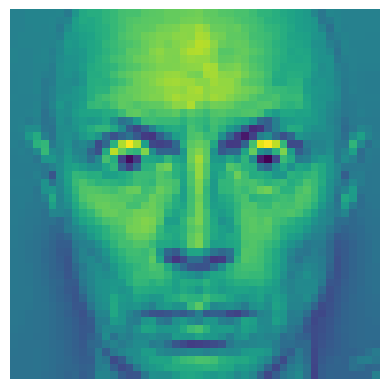

In [5]:
folder_path = r"C:\Users\Jatin Sharma\Downloads\archive (8)\train\surprised"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]
images = []
for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = Image.open(image_path)
    image_array = np.array(image)
    images.append(image_array)
# Display the first image as an example
plt.imshow(images[0])
plt.axis('off')  # Hide the axes
plt.show()


In [6]:
image_surprised=images

In [7]:
folder_path = r"C:\Users\Jatin Sharma\Downloads\archive (8)\train\angry"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]
images = []
for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = Image.open(image_path)
    image_array = np.array(image)
    images.append(image_array)
images_angry=images
folder_path = r"C:\Users\Jatin Sharma\Downloads\archive (8)\train\sad"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]
images = []
for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = Image.open(image_path)
    image_array = np.array(image)
    images.append(image_array)
image_sad=images
folder_path = r"C:\Users\Jatin Sharma\Downloads\archive (8)\train\happy"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]
images = []
for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = Image.open(image_path)
    image_array = np.array(image)
    images.append(image_array)
image_happy=images
folder_path = r"C:\Users\Jatin Sharma\Downloads\archive (8)\train\fearful"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))]
images = []
for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = Image.open(image_path)
    image_array = np.array(image)
    images.append(image_array)
image_neutral=images

In [8]:
image_angry=images_angry

In [9]:
extra_angry=image_angry
extra_surprised=image_surprised
extra_happy=image_happy
extra_sad=image_sad
extra_neutral=image_neutral

In [10]:
label_surprised=np.full(len(image_surprised),'surprised')
label_neutral=np.full(len(image_neutral),'neutral')
label_happy=np.full(len(image_happy),'happy')
label_sad=np.full(len(image_sad),'sad')
label_angry=np.full(len(image_angry),'angry')

In [11]:
image_angry=np.array(image_angry)
image_surprised=np.array(image_surprised)
image_happy=np.array(image_happy)
image_sad=np.array(image_sad)
image_neutral=np.array(image_neutral)

In [12]:
image_angry=image_angry.reshape(image_angry.shape[0],48*48)
image_surprised=image_surprised.reshape(image_surprised.shape[0],48*48)
image_happy=image_happy.reshape(image_happy.shape[0],48*48)
image_sad=image_sad.reshape(image_sad.shape[0],48*48)
image_neutral=image_neutral.reshape(image_neutral.shape[0],48*48)

### Combining the numpy arrays of all 5 types of moods

In [14]:
X_train=np.array([])
#X_train.append(image_surprised,image_neutral,image_happy,image_sad,image_angry)

In [16]:
X_train=np.append(X_train,image_angry)
X_train=np.append(X_train,image_surprised)
X_train=np.append(X_train,image_happy)
X_train=np.append(X_train,image_sad)
X_train=np.append(X_train,image_neutral)
X_train=X_train.reshape(int(X_train.shape[0]//2304),2304)

In [17]:
X_train.shape

(23308, 2304)

In [18]:
Y_train=np.array([])
Y_train=np.append(Y_train,label_angry)
Y_train=np.append(Y_train,label_surprised)
Y_train=np.append(Y_train,label_happy)
Y_train=np.append(Y_train,label_sad)
Y_train=np.append(Y_train,label_neutral)

In [19]:
Y_train.shape

(23308,)

In [20]:
X_train

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [117., 116., 113., ...,  46.,  47.,  49.],
       ...,
       [215., 215., 215., ..., 170., 152., 156.],
       [250., 250., 250., ...,  21.,  23.,  20.],
       [224., 229., 236., ..., 109., 124., 124.]])

In [21]:
Y_train

array(['angry', 'angry', 'angry', ..., 'neutral', 'neutral', 'neutral'],
      dtype='<U32')

#### creating a emotions dictionary to assign numbers to the emotions for calculations

In [22]:
emotions={'angry':0,'surprised':1,'happy':2,'sad':3,'neutral':4} # isko dict banao bhai
emotions_no=[1,2,3,4,5]


## Splliting the data into test and train set (taken train set just 40% for faster implementation of code )

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)
X_train.shape
Y_train.shape

(23308, 1)

In [25]:
X_train_1,X_test_1,Y_train_1,Y_test_1=train_test_split(X_train, Y_train, test_size=0.6,random_state=42)


In [26]:
Y_train_1.shape

(9323, 1)

#### Converting the train sets shape into (features,examples) form

In [27]:
X_train_1=X_train_1.T
Y_train_1=np.array(Y_train_1)
Y_train_1=Y_train_1.reshape(len(Y_train_1),)


#### scaling down the numbers in train set for faster implementation

In [28]:
from sklearn.preprocessing import StandardScaler


In [29]:
Y_train_emotions=Y_train_1
y_train=[]
for i in Y_train_1:
    y_train.append(emotions[i])
y_train=np.array(y_train)

In [31]:
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)

In [32]:
X_train_1.shape

(2304, 9323)

In [33]:
y_train.shape

(9323,)

#### converting y_train into (moods,examples) form and the example's mood will be labelled 1 and other to 0

In [34]:
tt=[]
for i in y_train:
    zero=np.zeros(5)
    zero[i]=1
    tt.append(zero)
tt=np.array(tt)

In [35]:
y_train_1=tt.T

In [36]:
y_train_1

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

## CODING NEURAL NETWORK FROM SCRATCH

In [63]:
class NN:
    def __init__(self,emotions,nodes=[100,5]):
        self.nodes=nodes
        self.emotions=emotions
        self.w=None
        self.b=None
    def forward_prop(self,x,y,y_emotion,parameters):
        layers=len(self.nodes)
        w=parameters[f'w{1}']
        b=parameters[f'b{1}']
        a_prev=parameters[f'a{0}']
        z1=np.dot(w,a_prev)+b
        a1=self.tanh(z1)
        parameters[f'z{1}']=z1
        parameters[f'a{1}']=a1
        z2=np.dot(parameters['w2'],parameters[f'a{1}'])+parameters['b2']
        parameters[f'z{layers}'],parameters[f'a{layers}'],parameters['probabilities']=self.softmax(z2,y_emotion)
        return parameters
        
    def fit(self,x,y,y_emotions,lr,iterations=1000):
        layers=len(self.nodes)
        parameters={
            'a0':x
        }
        dbs=0
        # initiate parameters
        for i in range(layers):
            w=np.random.randn(self.nodes[i],parameters[f'a{i}'].shape[0])*0.01
            b=np.zeros((self.nodes[i],1))
            parameters[f'w{i+1}']=w
            parameters[f'b{i+1}']=b
            parameters[f'a{i+1}']=np.zeros((self.nodes[i],parameters[f'a{i}'].shape[1]))
            
        for i in range(iterations):
            parameters=self.forward_prop(x,y,y_emotions,parameters)
            costing=self.cost(parameters['a2'],y)
            #if ( (i!=0) and ((iterations/i) ==5) or  (i!=0) and ((iterations/i) ==3) or (i!=0) and ((iterations/i)==1)):
            if (i%(iterations/10) == 0):
                print(f'iteration number {i} : cost = {costing}')
            dbs=self.back_prop(parameters,x.shape[1],y)
            parameters=self.update_parameters(parameters,dbs,lr)
        return parameters,dbs
        
    def relu(self,x):
        return np.maximum(x, 0)
        
    def update_parameters(self,parameters,dbs,lr):
        w1,dw1=parameters['w1'],dbs['dw1']
        w2,dw2=parameters['w2'],dbs['dw2']
        b1,db1=parameters['b1'],dbs['db1']
        b2,db2=parameters['b2'],dbs['db2']
        w1=w1-lr*dw1
        w2=w2-lr*dw2
        b1=b1-lr*db1
        b2=b2-lr*db2
        parameters['w1']=w1
        parameters['b1']=b1
        parameters['w2']=w2
        parameters['b2']=b2
        return parameters
        
    def softmax(self,z,y):
        z1= np.exp(z - np.max(z, axis=0, keepdims=True))
        sum=np.sum(z1,axis=0,keepdims=True)
        z1=z1/sum
        preds=np.zeros(len(y))
        for i in range(len(y)):
            preds[i]=z1[self.emotions[y[i]],i]
        preds=np.array(preds)
        
        return z,z1,preds
        
    def softmax_pred(self,z):
        z1 = np.exp(z - np.max(z, axis=0, keepdims=True))
        sum=np.sum(z1,axis=0,keepdims=True)
        z1=z1/sum
        return z1
        
    def cost(self,preds,y):
        #z=y*np.log(preds)
        #z1=np.sum(z,axis=1)
        #z2=-z1/len(y)
        m = y.shape[1]
        log_likelihood = -np.log(preds[y.argmax(axis=0), range(m)])
        loss = np.sum(log_likelihood) / m
        return loss
        #return np.sum(z2)
        
    def back_prop(self,parameters,eg,y):
        dbs={}
        layers=len(self.nodes)
        a2=parameters[f'a{layers}']
        dz2=a2-y
        dw2=(1/eg)*np.dot(dz2,parameters[f'a{layers-1}'].T)
        db2=(1/eg)*np.sum(dz2,axis=1,keepdims=True)
        dpp=self.derivative_tanh(parameters[f'a{layers-1}'])
        dz1= np.dot(parameters['w2'].T,dz2)*dpp
        dw1=(1/eg)*np.dot(dz1,parameters[f'a{layers-2}'].T)
        db1=(1/eg)*np.sum(dz1,axis=1,keepdims=True)
        dbs['dw1']=dw1
        dbs['dw2']=dw2
        dbs['db1']=db1.reshape(dw1.shape[0],1)
        dbs['db2']=db2.reshape(dw2.shape[0],1)
        return dbs

    def predict(self,test,parameters):
        w1=parameters['w1']
        w2=parameters['w2']
        b1=parameters['b1']
        b2=parameters['b2']
        z1=np.dot(w1,test)+b1
        a1=self.tanh(z1)
        z2=np.dot(w2,a1)+b2
        #scaler = StandardScaler()
        #z2 = scaler.fit_transform(z2)
        predictions=self.softmax_pred(z2)
        inverted_dict = {value: key for key, value in self.emotions.items()}
        predictions=np.argmax(predictions,axis=0)
        preds=[]
        for i in range(len(predictions)):
            preds.append(inverted_dict[predictions[i]])
        return preds,predictions
        
    def tanh(self,x):
        return np.tanh(x)
        
    def derivative_tanh(self,x):
        #return (1 - np.power(np.tanh(x), 2))
        return 1 - np.power(x, 2)
        

In [59]:
neural=NN(emotions)

In [60]:
parameters,dbs=neural.fit(X_train_1,y_train_1,Y_train_emotions,0.1)

iteration number 0 : cost = 1.6062318977651124
iteration number 100 : cost = 1.3572465434376648
iteration number 200 : cost = 1.2787003294801789
iteration number 300 : cost = 1.1807030944491785
iteration number 400 : cost = 1.1017001824342856
iteration number 500 : cost = 0.9367774796946976
iteration number 600 : cost = 0.820606200593138
iteration number 700 : cost = 0.7036583870762467
iteration number 800 : cost = 0.698278170064
iteration number 900 : cost = 0.5313836406969379


In [61]:
final_ans,predictions=neural.predict(X_train_1,parameters)

[[2.96500969e-01 3.09822676e-02 1.16445573e-02 ... 1.26444867e-01
  5.93464415e-01 5.87263758e-02]
 [1.67173602e-02 3.01902773e-02 7.05823189e-04 ... 8.40400665e-01
  1.12073287e-01 2.27306613e-03]
 [3.77956695e-01 1.84816696e-02 4.59640056e-01 ... 9.46169911e-03
  1.10017781e-01 2.97060892e-02]
 [6.56399743e-02 5.87473372e-01 5.27629231e-01 ... 9.30553907e-03
  8.52788774e-02 9.00294106e-01]
 [2.43185001e-01 3.32872413e-01 3.80333186e-04 ... 1.43872301e-02
  9.91656393e-02 9.00036331e-03]]


In [62]:
np.sum(final_ans==Y_train_emotions)/len(Y_train_emotions) #IT PERFORMS VERY WELL ON DATA SET

0.8773999785476778

#### ALSO CODED A 3 LAYER NEURAL NETWORK JUST FOR PRACTICE

In [64]:
class NN2:
    def __init__(self,emotions,nodes=[200,100,5]):
        self.nodes=nodes
        self.emotions=emotions
        self.w=None
        self.b=None
    def forward_prop(self,x,y,y_emotion,parameters):
        layers=len(self.nodes)
        w=parameters[f'w{1}']
        b=parameters[f'b{1}']
        a_prev=parameters[f'a{0}']
        z1=np.dot(w,a_prev)+b
        a1=self.tanh(z1)
        parameters[f'z{1}']=z1
        parameters[f'a{1}']=a1
        z2=np.dot(parameters['w2'],parameters[f'a{1}'])+parameters['b2']
        a2=self.tanh(z2)
        parameters['a2']=a2
        z3=np.dot(parameters['w3'],a2)+parameters['b3']
        parameters[f'z{layers}'],parameters[f'a{layers}'],parameters['probabilities']=self.softmax(z3,y_emotion)
        return parameters
        
    def fit(self,x,y,y_emotions,lr,iterations=100):
        layers=len(self.nodes)
        parameters={
            'a0':x
        }
        dbs=0
        # initiate parameters
        for i in range(layers):
            w=np.random.randn(self.nodes[i],parameters[f'a{i}'].shape[0])*0.01
            b=np.zeros((self.nodes[i],1))
            parameters[f'w{i+1}']=w
            parameters[f'b{i+1}']=b
            parameters[f'a{i+1}']=np.zeros((self.nodes[i],parameters[f'a{i}'].shape[1]))
            
        for i in range(iterations):
            parameters=self.forward_prop(x,y,y_emotions,parameters)
            costing=self.cost(parameters['a3'],y)
            #if ( (i!=0) and ((iterations/i) ==5) or  (i!=0) and ((iterations/i) ==3) or (i!=0) and ((iterations/i)==1)):
            if (i%(iterations/10) == 0):
                print(f'iteration number {i} : cost = {costing}')
            dbs=self.back_prop(parameters,x.shape[1],y)
            parameters=self.update_parameters(parameters,dbs,lr)
        return parameters,dbs
        
    def relu(self,x):
        return np.maximum(x, 0)
        
    def update_parameters(self,parameters,dbs,lr):
        w1,dw1=parameters['w1'],dbs['dw1']
        w2,dw2=parameters['w2'],dbs['dw2']
        b1,db1=parameters['b1'],dbs['db1']
        b2,db2=parameters['b2'],dbs['db2']
        w3,dw3=parameters['w3'],dbs['dw3']
        b3,db3=parameters['b3'],dbs['db3']
        w1=w1-lr*dw1
        w2=w2-lr*dw2
        b1=b1-lr*db1
        b2=b2-lr*db2
        w3=w3-lr*dw3
        b3=b3-lr*db3
        parameters['w1']=w1
        parameters['b1']=b1
        parameters['w2']=w2
        parameters['b2']=b2
        parameters['w3']=w3
        parameters['b3']=b3
        return parameters
        
    def softmax(self,z,y):
        z1= np.exp(z - np.max(z, axis=0, keepdims=True))
        sum=np.sum(z1,axis=0,keepdims=True)
        z1=z1/sum
        preds=np.zeros(len(y))
        for i in range(len(y)):
            preds[i]=z1[self.emotions[y[i]],i]
        preds=np.array(preds)
        
        return z,z1,preds
        
    def softmax_pred(self,z):
        z1 = np.exp(z - np.max(z, axis=0, keepdims=True))
        sum=np.sum(z1,axis=0,keepdims=True)
        z1=z1/sum
        return z1
        
    def cost(self,preds,y):
        #z=y*np.log(preds)
        #z1=np.sum(z,axis=1)
        #z2=-z1/len(y)
        m = y.shape[1]
        log_likelihood = -np.log(preds[y.argmax(axis=0), range(m)])
        loss = np.sum(log_likelihood) / m
        return loss
        #return np.sum(z2)
        
    def back_prop(self,parameters,eg,y):
        dbs={}
        layers=len(self.nodes)
        a3=parameters[f'a{layers}']
        dz3=a3-y
        dw3=(1/eg)*np.dot(dz3,parameters[f'a{layers-1}'].T)
        db3=(1/eg)*np.sum(dz3,axis=1,keepdims=True)
        dpp=self.derivative_tanh(parameters[f'a{layers-1}'])
        dz2= np.dot(parameters['w3'].T,dz3)*dpp
        dw2=(1/eg)*np.dot(dz2,parameters[f'a{layers-2}'].T)
        db2=(1/eg)*np.sum(dz2,axis=1,keepdims=True)
        dpp1=self.derivative_tanh(parameters[f'a{layers-2}'])
        dz1= np.dot(parameters['w2'].T,dz2)*dpp1
        dw1=(1/eg)*np.dot(dz1,parameters[f'a{layers-3}'].T)
        db1=(1/eg)*np.sum(dz1,axis=1,keepdims=True)
        dbs['dw1']=dw1
        dbs['dw2']=dw2
        dbs['dw3']=dw3
        dbs['db1']=db1.reshape(dw1.shape[0],1)
        dbs['db2']=db2.reshape(dw2.shape[0],1)
        dbs['db3']=db3.reshape(dw3.shape[0],1)
        return dbs

    def predict(self,test,parameters):
        w1=parameters['w1']
        w2=parameters['w2']
        b1=parameters['b1']
        b2=parameters['b2']
        w3=parameters['w3']
        b3=parameters['b3']
        z1=np.dot(w1,test)+b1
        a1=self.tanh(z1)
        z2=np.dot(w2,a1)+b2
        scaler = StandardScaler()
        z2 = scaler.fit_transform(z2)
        predictions=self.softmax_pred(z2)
        print(predictions)
        inverted_dict = {value: key for key, value in self.emotions.items()}
        predictions=np.argmax(predictions,axis=0)
        preds=[]
        for i in range(len(predictions)):
            preds.append(inverted_dict[predictions[i]])
        return preds,predictions
        
    def tanh(self,x):
        return np.tanh(x)
        
    def derivative_tanh(self,x):
        #return (1 - np.power(np.tanh(x), 2))
        return 1 - np.power(x, 2)